In [35]:
import os
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [134]:
def get_n_samples(data, n, seed=None):
    if seed is not None:
        np.random.seed(seed)
    return np.random.randint(data.shape[0], size=n)


def save_img_plot(img, save_path):
    if not os.path.isdir(os.path.dirname(save_path)):
        os.makedirs(os.path.dirname(save_path))
    fig = plt.figure()
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close(fig)


def plot_x_y_z(x,y,z=None,d=None,save=False,i=None,save_folder='/'):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(1,4,1)
    ax.set_title('Input')
    ax.imshow(x, cmap='gray')
    ax.axis("off")
    if save:
        save_img_plot(x, os.path.join(save_folder, f"{i}_input.png"))

    ax = fig.add_subplot(1,4,2)
    ax.set_title('Output')
    ax.imshow(y, cmap='gray')
    ax.axis("off")
    plt.subplots_adjust(hspace=0.02, wspace=0.01)
    if save:
        save_img_plot(y, os.path.join(save_folder, f"{i}_output.png"))

    if z is not None:
        ax = fig.add_subplot(1,4,3)
        ax.set_title('Ground truth')
        ax.imshow(z, cmap='gray')
        ax.axis("off")
        plt.subplots_adjust(hspace=0.02, wspace=0.01)
        if save:
            save_img_plot(z, os.path.join(save_folder, f"{i}_ground_truth.png"))

    if d is not None:
        ax = fig.add_subplot(1,4,4)
        ax.set_title('Overlay')
        ax.imshow(d, cmap='gray')
        ax.axis("off")
        plt.subplots_adjust(hspace=0.02, wspace=0.01)
    elif d is None:
        x = cv2.cvtColor(x, cv2.COLOR_GRAY2BGR)

        # Overlay ground truth in green
        cnts,_ = cv2.findContours(z, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(x, cnts, -1, (0,255,0), 2)
        # Overlay prediction in red
        cnts,_ = cv2.findContours(y, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(x, cnts, -1, (255,0,0), 1)
        

        ax = fig.add_subplot(1,4,4)
        ax.imshow(x)
        ax.axis("off")
        ax.set_title("Overlay")
        if save:
            save_img_plot(d, os.path.join(save_folder, f"{i}_difference_input-output.png"))

    plt.show()

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/Nike_s962_v7_CAR_L2_081_0000.png


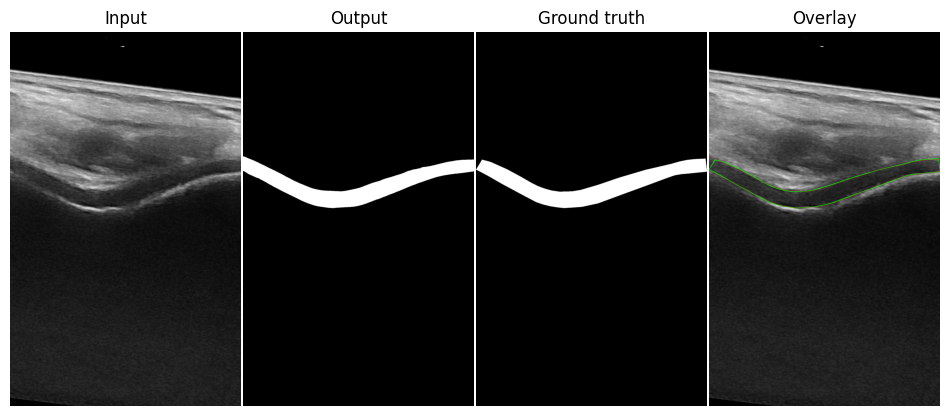

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/ACL08_CC21_r1_non-inj_central_pre_control_1_094_0000.png


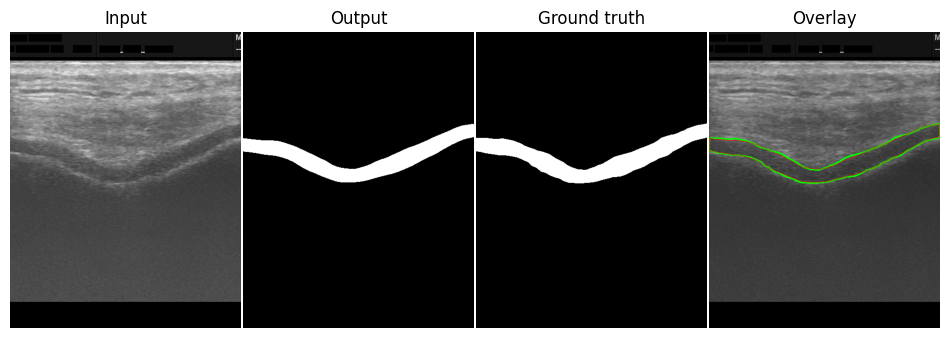

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/Nike_s909_L_CAR_5_113_0000.png


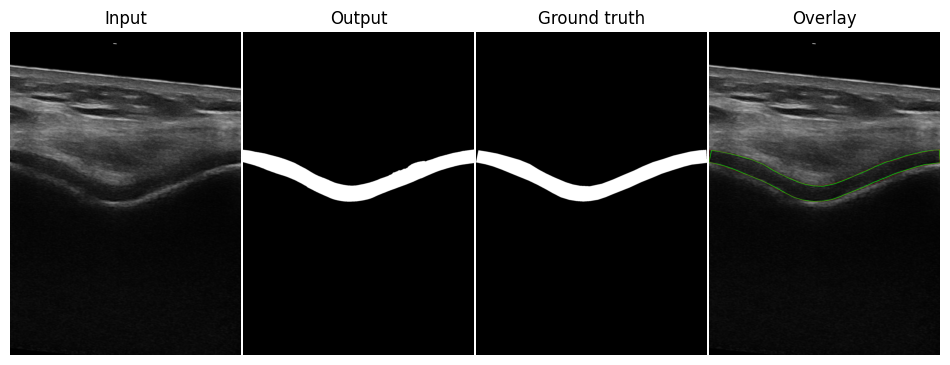

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/Nike_s971_v7_CAR_L1_084_0000.png


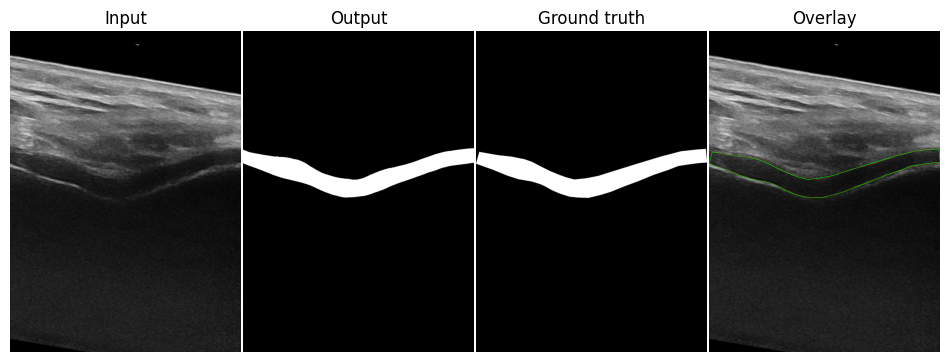

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/Nike_s927_v6_CAR_R2_155_0000.png


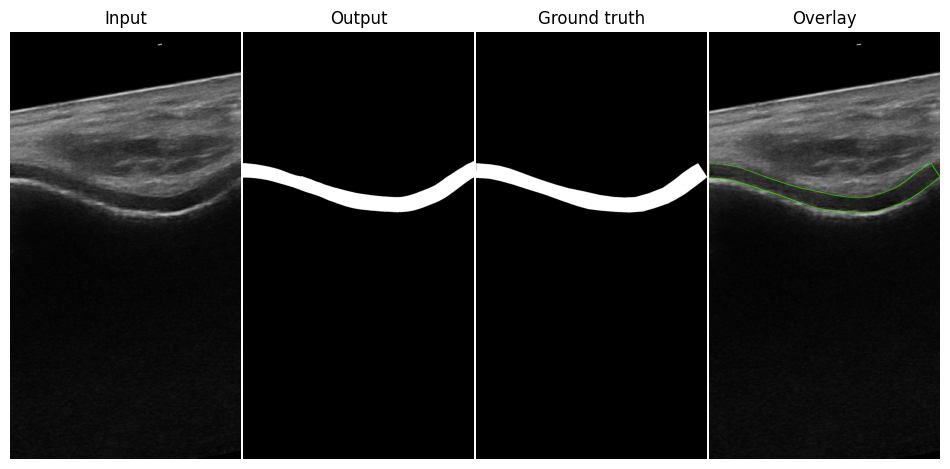

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/Nike_s916_L_CAR_7_136_0000.png


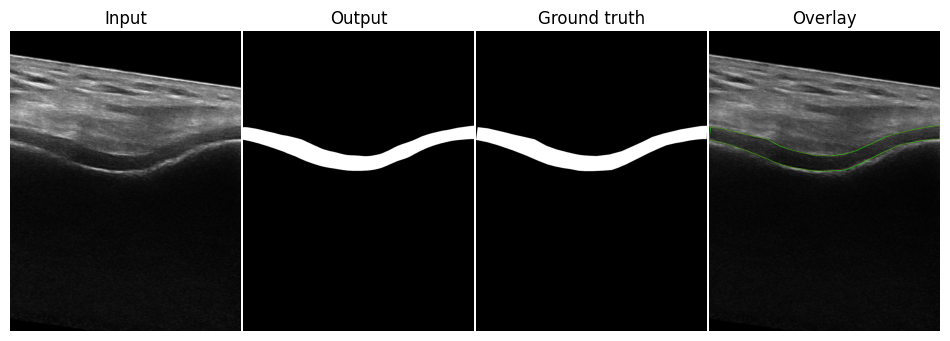

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/NIKE_S906_V7_L_CAR_1_049_0000.png


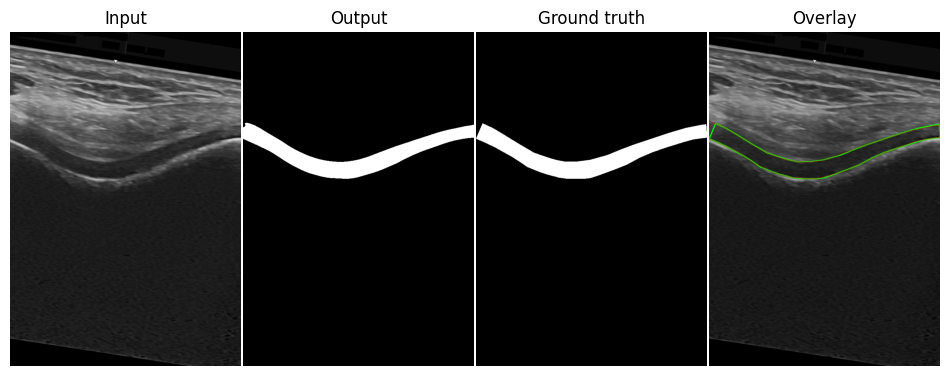

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/knee141_170_0000.png


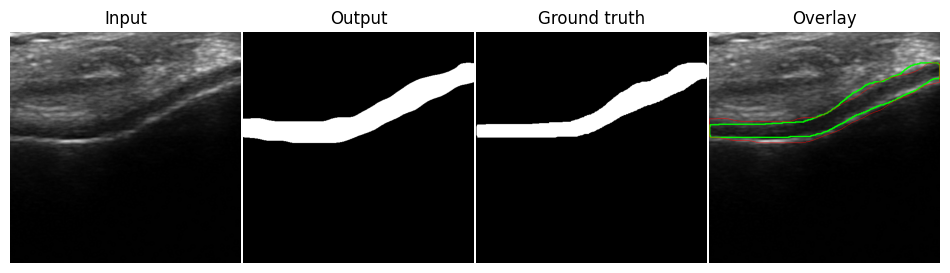

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/Nike_s976_L_CAR_3_044_0000.png


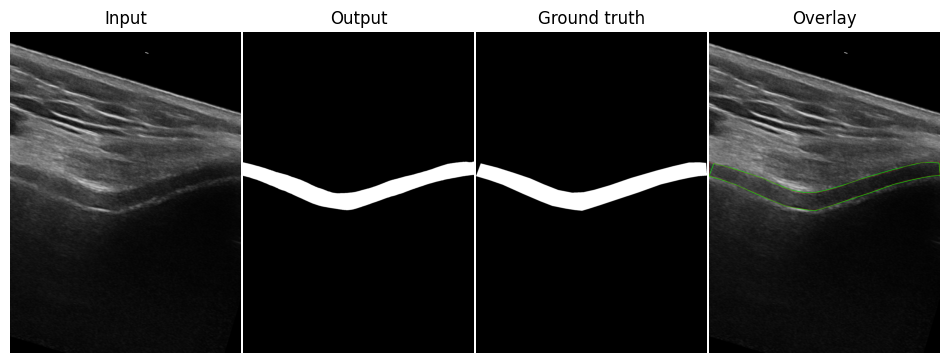

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/ACL14_CC34_r1_inj_central_pre_control_2_034_0000.png


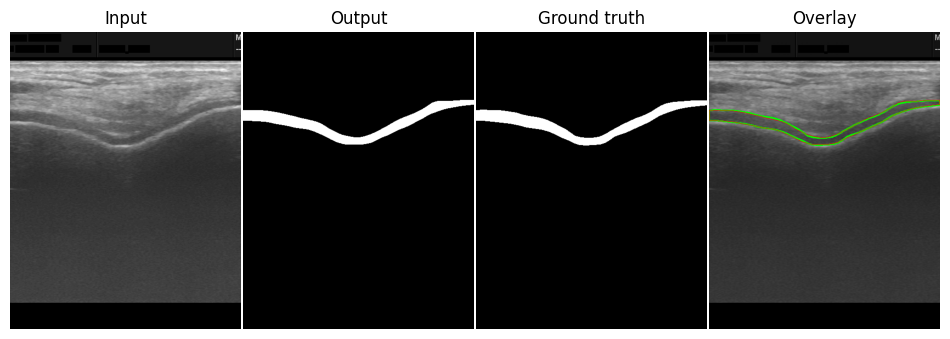

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/Nike_s993_v6_CAR_R3_163_0000.png


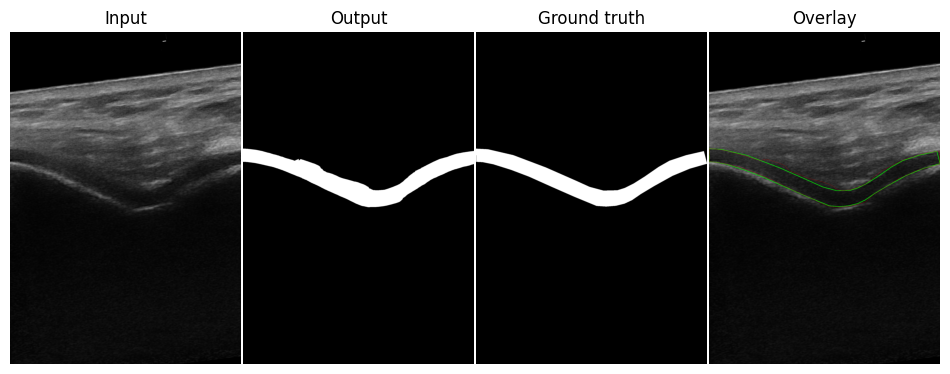

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/Nike_s948_L_CAR_8_028_0000.png


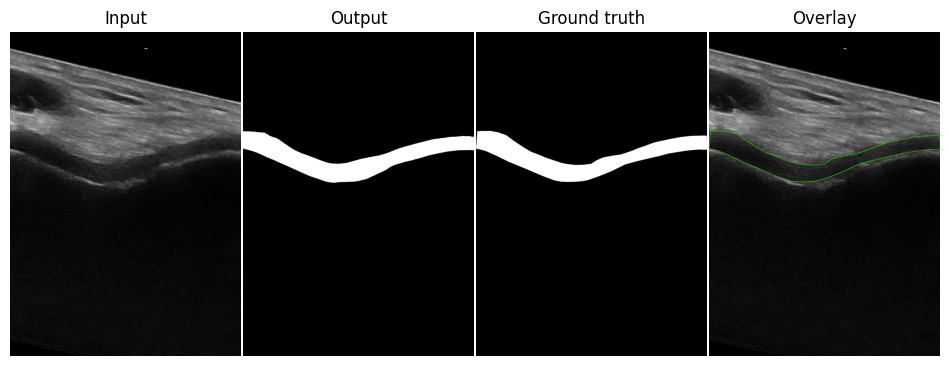

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/NIKE_S964_T4_L_CAR_2_115_0000.png


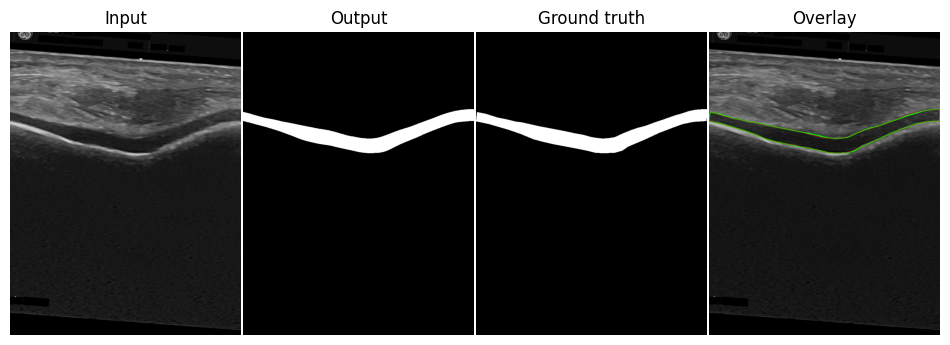

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/NIKE_S508_V7_R_CAR_2_177_0000.png


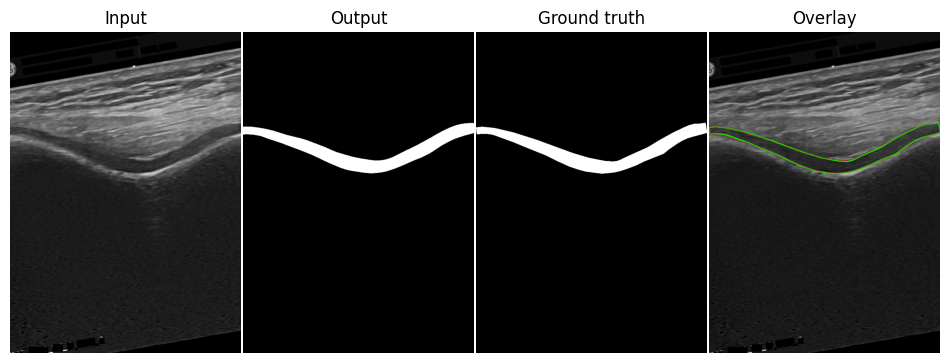

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/knee012_060_0000.png


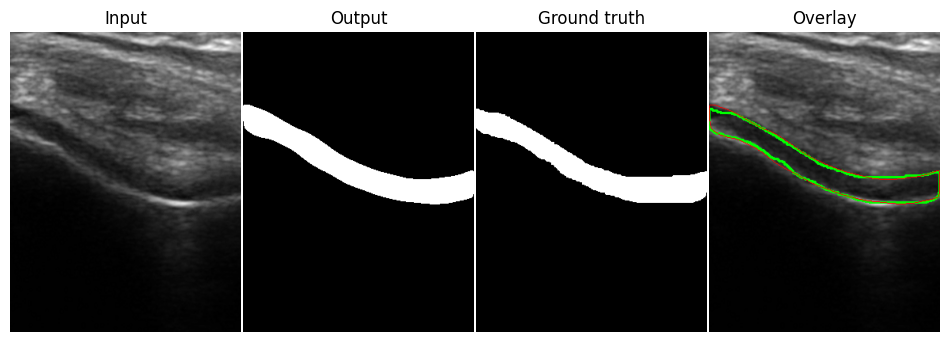

/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound/imagesTs/Nike_s984_v7_CAR_R3_038_0000.png


KeyboardInterrupt: 

In [138]:
folder = f"/home/alvin/CIID/nnUNetv2/nnUNet_raw/Dataset030_combined_knee_ultrasound"

images = glob.glob(os.path.join(folder, "imagesTs", "*.png"))
samples = get_n_samples(np.array(images), n=10, seed=None)

sample_images = np.array(images)[samples]

for img in images:
    print(img)

    fn = os.path.basename(img).replace("_0000.png", ".png")
    mask = os.path.join(folder, "labelsTs", fn)
    pred = os.path.join(folder, "predictionsTs_postprocessed", fn)
    
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
    pred = cv2.imread(pred, cv2.IMREAD_GRAYSCALE)
    plot_x_y_z(img, pred, mask, save=True)
    